## 什么是时序
基于过去的数据预测未来的值。
## 与回归的区别
回归的主要目标是建立一个模型，以便在给定自变量的情况下预测因变量的值。它关注的是变量之间的关系。
时序分析的主要目标是识别时间序列中的模式（如趋势、季节性）并进行预测。它关注的是数据随时间变化的行为。
## 平稳与不平稳序列和ACI
在时间序列分析中，ACI方法主要涉及自回归条件异方差性模型（Autoregressive Conditional Heteroskedasticity），用于处理和分析具有时间依赖性和波动性变化的数据。这种方法在金融、经济等领域的应用非常广泛，能够有效捕捉数据中的动态特征和不确定性。
## 什么是EDA 
EDA（Exploratory Data Analysis，探索性数据分析）是一种用于分析数据集的初步步骤，旨在总结其主要特征，通常使用可视化方法。EDA的主要目标是通过图形和统计方法来理解数据的结构、模式、趋势和异常值，从而为后续的分析和建模提供基础。
数据收集：
收集相关的数据集，确保数据的完整性和准确性。

数据清洗：
处理缺失值、重复值和异常值，确保数据质量，以便进行有效的分析。

数据描述：
使用描述性统计（如均值、中位数、标准差、分位数等）来总结数据的基本特征。

数据可视化：
通过图形化手段（如直方图、散点图、箱线图、热图等）来展示数据的分布、关系和趋势。这有助于识别数据中的模式和异常值。

变量关系分析：
分析不同变量之间的关系，例如使用相关性分析、交叉表等方法，了解变量之间的相互影响。

模式识别：
识别数据中的潜在模式、趋势和周期性变化，为后续的建模和预测提供依据。

# 1.AR （Auto Regression）模型
一般的P阶自回归模型
$$ X_t= \alpha_1X_{t-1}+\alpha_2X_{t-2}+...+\alpha_pX_{t-p} +u_t$$
如果随机扰动项是一个白噪声（$  u_t=\xi_t$），则称为一个纯AR（p）过程，记为
$$ X_t= \alpha_1X_{t-1}+\alpha_2X_{t-2}+...+\alpha_pX_{t-p} +\xi_t$$
自回归模型首先需要确定一个阶数p，表示用几期的历史值来预测当前值。

自回归模型有很多的限制：

（1）自回归模型是用自身的数据进行预测

（2）时间序列数据必须具有平稳性(差分高阶差分保持平稳)

（3）自回归只适用于预测与自身前期相关的现象（时间序列的自相关性）
## 2。MA （Moving Average）模型
在AR模型中，如果 $u_t$不是一个白噪声（零均值长方差），通常认为它是一个q阶的移动平均。即
$$ u_t= \varepsilon_t+\beta_1\varepsilon_{t-1}+ \beta_2\varepsilon_{t-2}+...+ \beta_q\varepsilon_{t-q}$$
其中 $\varepsilon_t$ 表示白噪声序列。
特别的，当$  X_t=u_t$ ，即时间序列当前值与历史值没有关系，而只依赖于历史白噪声的线性组合，就得到MA模型：
$$ X_t= \varepsilon_t+\beta_1\varepsilon_{t-1}+ \beta_2\varepsilon_{t-2}+...+ \beta_q\varepsilon_{t-q}$$
需要指出一点，AR模型中历史白噪声的影响是间接影响当前预测值的（通过影响历史时序值）。
## 3.ARMA 模型
将AR（p）与MA（q）结合，得到一个一般的自回归移动平均模型ARMA（p，q）：
$$ X_t= \alpha_1X_{t-1}+\alpha_2X_{t-2}+...+\alpha_pX_{t-p} +\varepsilon_t+\beta_1\varepsilon_{t-1}+ \beta_2\varepsilon_{t-2}+...+ \beta_q\varepsilon_{t-q}$$
（1）一个随机时间序列可以通过一个自回归移动平均模型来表示，即该序列可以由其自身的过去或滞后值以及随机扰动项来解释。

（2）如果该序列是平稳的，即它的行为并不会随着时间的推移而变化，那么我们就可以通过该序列过去的行为来预测未来。
## 4.ARIMA 模型
将自回归模型（AR）、移动平均模型（MA）和差分法结合，我们就得到了差分自回归移动平均模型 ARIMA（p、d、q），其中 d 是需要对数据进行差分的阶数。
## 5生成 ARIMA 模型的基本步骤：
1.对序列绘图，进行 ADF 检验，观察序列是否平稳；对于非平稳时间序列要先进行 d 阶差分，转化为平稳时间序列；
2.经过第一步处理，已经得到平稳时间序列。要对平稳时间序列分别求得其自相关系数（ACF）和偏自相关系数（PACF），通过对自相关图和偏自相关图的分析，得到最佳的阶数p、q；
3.由以上得到的d、q、p ，得到 ARIMA 模型。然后开始对得到的模型进行模型检验。

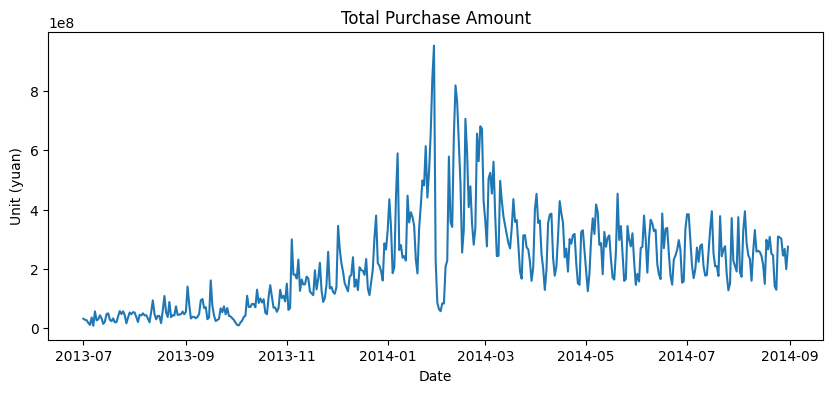

In [6]:
#查看 user_balance_table.csv 文件
import matplotlib.pyplot as plt
import pandas as pd

# 读取CSV文件
user_balance = pd.read_csv('./user_balance_table.csv')

# 按照报告日期分组并计算总购买金额和总赎回金额
df_tmp = user_balance.groupby(['report_date'])[['total_purchase_amt', 'total_redeem_amt']].sum()
df_tmp.reset_index(inplace=True)

# 将报告日期转换为日期格式
df_tmp['report_date'] = pd.to_datetime(df_tmp['report_date'], format='%Y%m%d')

# 设置报告日期为索引
df_tmp.index = df_tmp['report_date']

# 绘制总购买金额的图表
total_purchase_amt = plt.figure(figsize=(10, 4))
ax = total_purchase_amt.add_subplot(111)
ax.set(title='Total Purchase Amount',
       ylabel='Unit (yuan)', xlabel='Date')
plt.plot(df_tmp['report_date'], df_tmp['total_purchase_amt'])
plt.show()


#### 从上图中可以看出，从2013-07 ~ 2014-04，余额宝每日的申购金额经历了一个较大的波动过程
#### 从2014-04开始，趋向于稳定的震荡(均值近似为常数)
#### ARIMA 模型是通过寻找历史数据之间的自相关性，来预测未来（假设未来将重复历史的走势），要求序列必须是平稳的。
#### 因此我们取2014-04-01 ~ 2014-07-31的数据作为训练集，将2014-08-01 ~ 2014-08-10的数据作为测试集。

In [9]:
import pandas as pd

def generate_purchase_seq():
    # 读取CSV文件并将'report_date'列解析为日期
    user_balance = pd.read_csv('./user_balance_table.csv', parse_dates=['report_date'], index_col='report_date')

    # 按照报告日期分组并计算总购买金额
    df = user_balance.groupby(['report_date'])['total_purchase_amt'].sum()
    purchase_seq = pd.Series(df, name='value')

    # 划分训练集和测试集
    purchase_seq_train = purchase_seq['2014-04-01':'2014-07-31']
    purchase_seq_test = purchase_seq['2014-08-01':'2014-08-10']

    # 将训练集和测试集保存为CSV文件
    purchase_seq_train.to_csv('./purchase_seq_train.csv', header=True)
    purchase_seq_test.to_csv('./purchase_seq_test.csv', header=True)

# 调用函数
generate_purchase_seq()


timeseries_adf :  (-2.063974751176986, 0.25924499643351695, 13, 108, {'1%': -3.4924012594942333, '5%': -2.8886968193364835, '10%': -2.5812552709190673}, 4191.005978668395)
timeseries_diff1_adf :  (-6.506628772152364, 1.1269525633397649e-08, 12, 108, {'1%': -3.4924012594942333, '5%': -2.8886968193364835, '10%': -2.5812552709190673}, 4156.074758015524)
timeseries_diff2_adf :  (-6.06034154782398, 1.2168678925531574e-07, 13, 106, {'1%': -3.4936021509366793, '5%': -2.8892174239808703, '10%': -2.58153320754717}, 4141.690876882428)


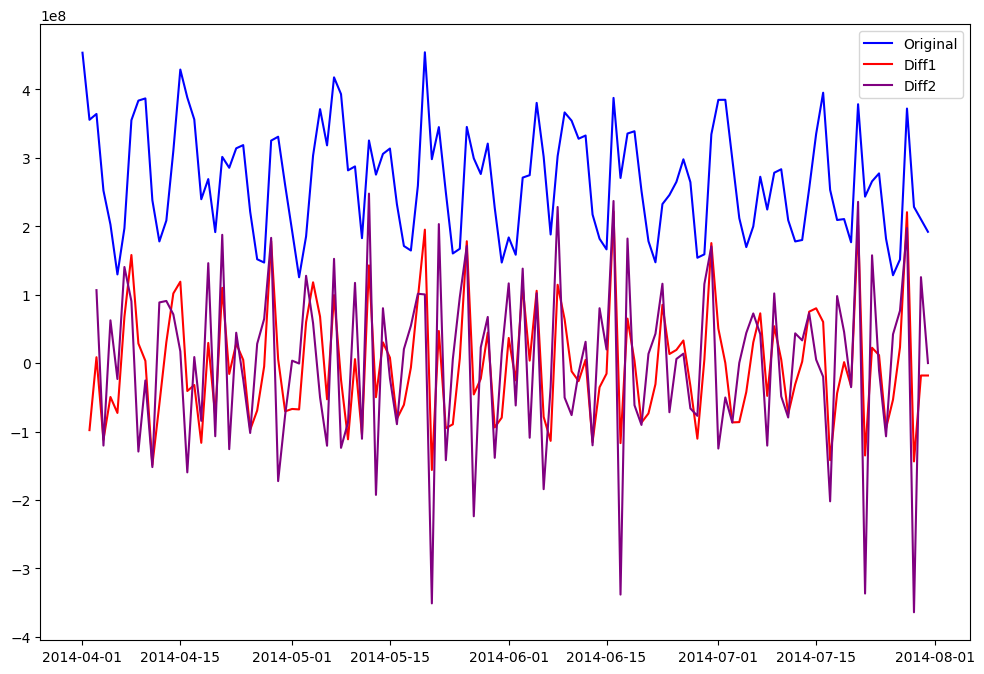

In [12]:
#查看一下训练集 purchase_seq_train.csv 的差分效果，并对每一次差分结果做 ADF 检验：
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller as ADF

import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import adfuller as ADF

def diff(timeseries):
    timeseries_diff1 = timeseries.diff(1).dropna()
    timeseries_diff2 = timeseries_diff1.diff(1).dropna()

    timeseries_adf = ADF(timeseries['value'].tolist())
    timeseries_diff1_adf = ADF(timeseries_diff1['value'].tolist())
    timeseries_diff2_adf = ADF(timeseries_diff2['value'].tolist())

    print('timeseries_adf : ', timeseries_adf)
    print('timeseries_diff1_adf : ', timeseries_diff1_adf)
    print('timeseries_diff2_adf : ', timeseries_diff2_adf)

    plt.figure(figsize=(12, 8))
    plt.plot(timeseries, label='Original', color='blue')
    plt.plot(timeseries_diff1, label='Diff1', color='red')
    plt.plot(timeseries_diff2, label='Diff2', color='purple')
    plt.legend(loc='best')
    plt.show()

# 读取训练集数据
purchase_seq_train = pd.read_csv('./purchase_seq_train.csv', parse_dates=['report_date'], index_col='report_date')

# 调用差分函数
diff(purchase_seq_train)


原始时间序列（timeseries_adf）：

ADF 统计量：-2.064
p 值：0.259
结论：由于 p 值大于 0.05，我们不能拒绝原假设，说明原始时间序列可能是非平稳的。

第一次差分（timeseries_diff1_adf）：
ADF 统计量：-6.507
p 值：1.127e-08
结论：由于 p 值远小于 0.05，我们可以拒绝原假设，说明第一次差分后的时间序列是平稳的。

第二次差分（timeseries_diff2_adf）：
ADF 统计量：-6.060
p 值：1.217e-07
结论：同样，由于 p 值远小于 0.05，我们可以拒绝原假设，说明第二次差分后的时间序列也是平稳的。
从结果来看，要想使得序列变得平稳，需要进行一阶差分。我们对序列进行一阶差分，并查看差分后序列的 ACF、PACF：

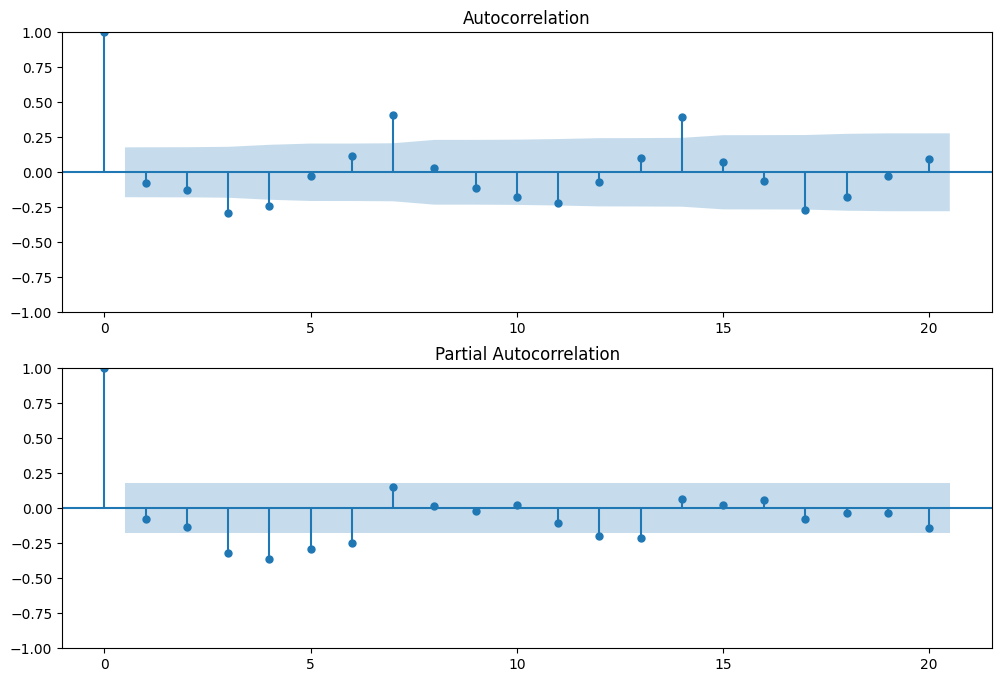

In [14]:
import statsmodels.api as sm

def autocorrelation(timeseries, lags):
    fig = plt.figure(figsize=(12, 8))
    ax1 = fig.add_subplot(211)
    sm.graphics.tsa.plot_acf(timeseries, lags=lags, ax=ax1)
    ax2 = fig.add_subplot(212)
    sm.graphics.tsa.plot_pacf(timeseries, lags=lags, ax=ax2)
    plt.show()

# 读取训练集数据，使用 pd.to_datetime 进行日期解析
purchase_seq_train = pd.read_csv('./purchase_seq_train.csv', parse_dates=['report_date'], index_col='report_date')

# 进行一次差分
purchase_seq_train_diff = purchase_seq_train.diff(1).dropna()

# 绘制自相关和偏自相关图
autocorrelation(purchase_seq_train_diff, 20)


### 如何确定 AR（p）的 p 值，MA（q）的 q 值？
#### 拖尾和截尾
##### 拖尾指序列以指数率单调递减或震荡衰减:
##### 拖尾序列通常指的是在时间序列数据中，序列的尾部部分表现出某种特定的模式或特征。这种模式可能与数据的长期趋势、季节性或周期性变化有关。拖尾序列的特征可以用于预测未来的值或识别潜在的异常值。
##### 而截尾指序列从某个时点变得非常小：
##### 截尾序列是指在数据收集过程中，由于某些原因，部分数据无法被完全观测到。截尾通常发生在生存分析中，例如，某些个体在研究结束时仍然存活，或者在研究期间失访。这种情况下，虽然我们知道个体的生存时间在某个范围内，但无法获得确切的值。
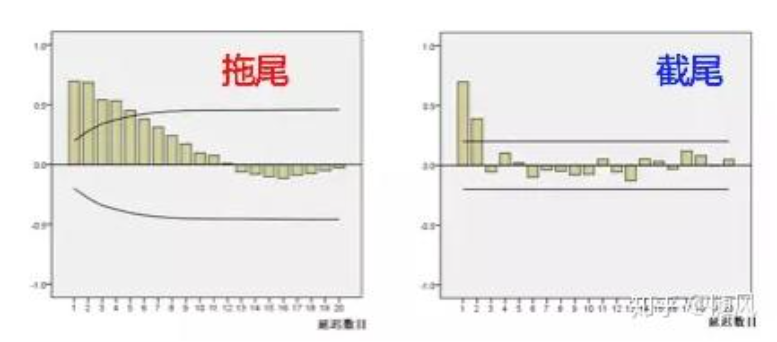
### p，q阶数的确定
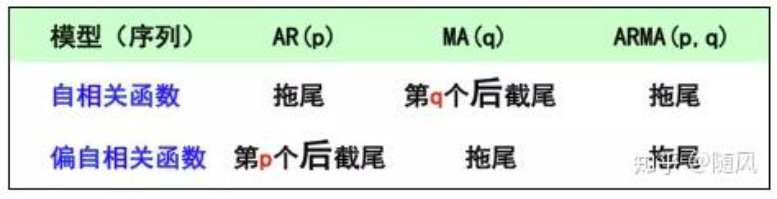
### 从序列 ACF 、PACF 的图中没有发现明显的拖尾或截尾，说明对于这样的序列，并不适合用ARIMA 模型来拟合。
<h1>如何用 ARIMA 模型来拟合这样的曲线呢？</h1>
<b style="color: red;">这里我们将先通过对时间序列分解（STL），再采用 ARIMA 模型来拟合趋势序列与残差序列。</b>

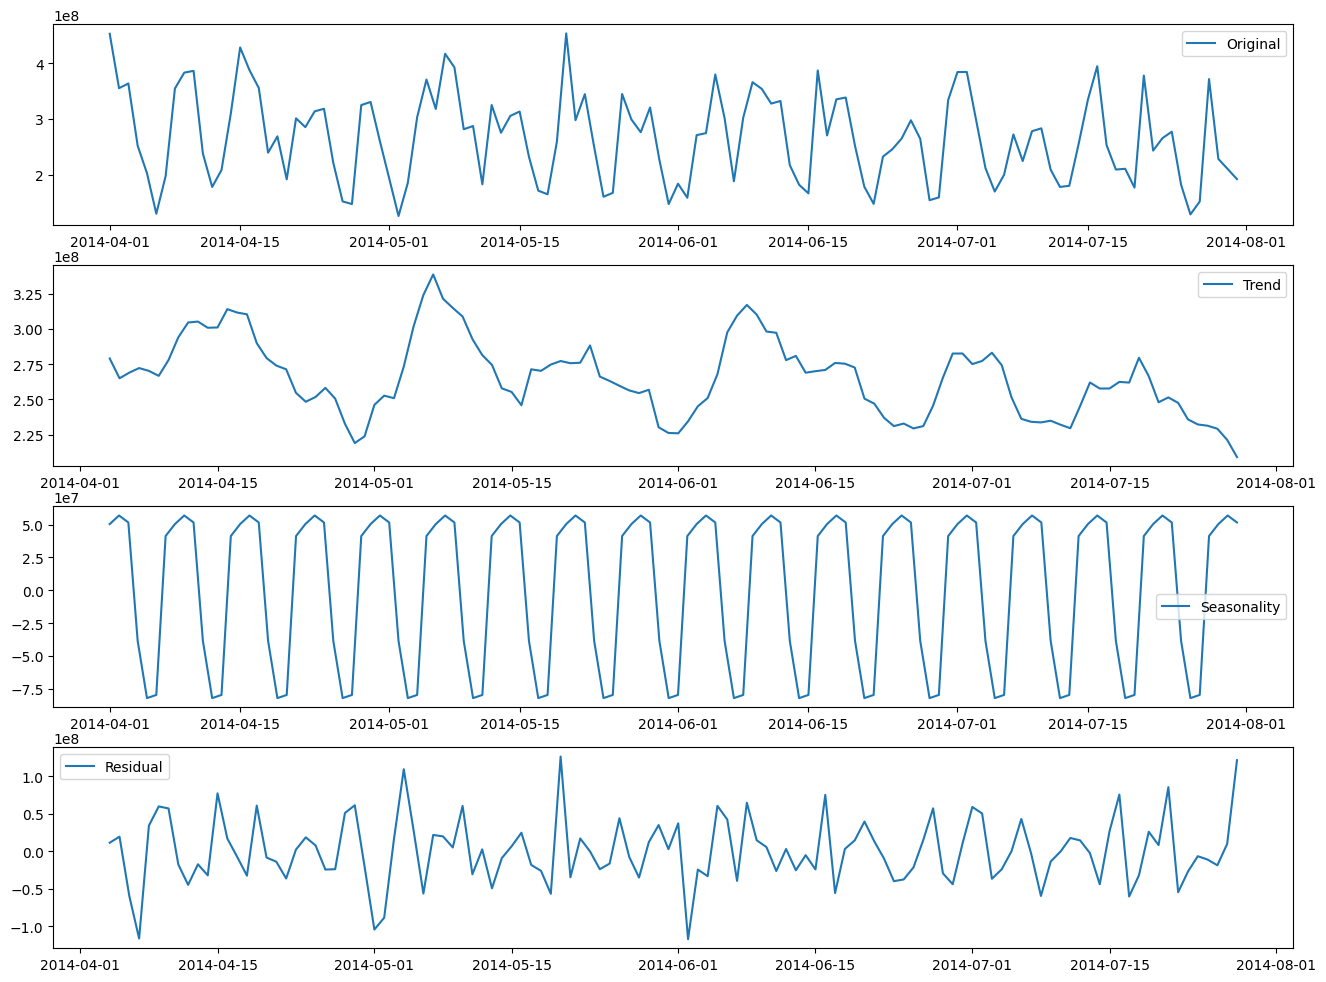

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

def decomposing(timeseries):
    decomposition = seasonal_decompose(timeseries, model='additive')  # 可以选择 'additive' 或 'multiplicative'
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    plt.figure(figsize=(16, 12))
    plt.subplot(411)
    plt.plot(timeseries, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residual')
    plt.legend(loc='best')
    plt.show()

# 使用 pd.to_datetime 解析日期
purchase_seq_train = pd.read_csv('./purchase_seq_train.csv', parse_dates=['report_date'], index_col='report_date')
decomposing(purchase_seq_train)  # 替换为实际的列名



从上图中可以看到，原序列有明显的周期性，而且是以七天为一个周期（可以将具体的数值打印出来）。因此我们只对趋势序列和残差序列去拟合，同时认为这样的周期性会延伸至2014-08-01~2014-08-10的测试集上。下面将介绍对趋势序列、残差序列的拟合过程。
先观察趋势序列、残差序列的差分效果，并对每一次差分结果做 ADF 检验，函数代码请参考前面的内容：

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# 读取数据，直接解析日期
purchase_seq_train = pd.read_csv('./purchase_seq_train.csv', parse_dates=['report_date'], index_col='report_date')

# 确认数据列名
print(purchase_seq_train.columns)


timeseries = purchase_seq_train  

# 进行季节性分解
decomposition = seasonal_decompose(timeseries, model='additive')  # 可以选择 'additive' 或 'multiplicative'
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# 填充缺失值
trend = trend.fillna(0)
seasonal = seasonal.fillna(0)
residual = residual.fillna(0)

# 进行差分操作
def diff(series):
    return series.diff().dropna()

# 计算差分
trend_diff = diff(trend)
residual_diff = diff(residual)

# ADF检验
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

# 进行ADF检验
print("Trend ADF Test:")
adf_test(trend_diff)

print("\nResidual ADF Test:")
adf_test(residual_diff)


Index(['value'], dtype='object')
Trend ADF Test:
ADF Statistic: -3.3190106543028066
p-value: 0.014049791035189598
Critical Values:
   1%: -3.4912451337340342
   5%: -2.8881954545454547
   10%: -2.5809876033057852

Residual ADF Test:
ADF Statistic: -5.848541111605917
p-value: 3.6349784404491896e-07
Critical Values:
   1%: -3.492995948509562
   5%: -2.888954648057252
   10%: -2.58139291903223


## ADF 检验结果分析
##### 趋势（Trend）检验：
##### ADF Statistic: -3.319
##### p-value: 0.014
##### 临界值:
##### 1%: -3.491
##### 5%: -2.888
##### 10%: -2.581
由于 ADF 统计量 (-3.319) 大于 1% 临界值 (-3.491)，但小于 5% 临界值 (-2.888)，并且 p-value 小于 0.05，这表明我们可以拒绝原假设（即时间序列是非平稳的），说明趋势部分是平稳的。

##### 残差（Residual）检验：
##### ADF Statistic: -5.849
##### p-value: 3.635e-07
##### 临界值:
##### 1%: -3.493
##### 5%: -2.889
##### 10%: -2.581
在残差部分，ADF 统计量 (-5.849) 小于 1% 临界值 (-3.493)，并且 p-value 远小于 0.01，这表明我们可以强烈拒绝原假设，说明残差是平稳的。

## 总结
### 趋势部分：虽然趋势部分的平稳性不如残差部分强，但仍然可以认为是平稳的。
### 残差部分：残差显著平稳，这通常是时间序列分析中的一个好现象，表明模型能够很好地捕捉到数据的结构。

从 ADF 的检验结果来看，趋势序列和残差序列都已经比较平稳了，因此不需要进行差分。再看一下 ACF、PACF：

Index(['value'], dtype='object')


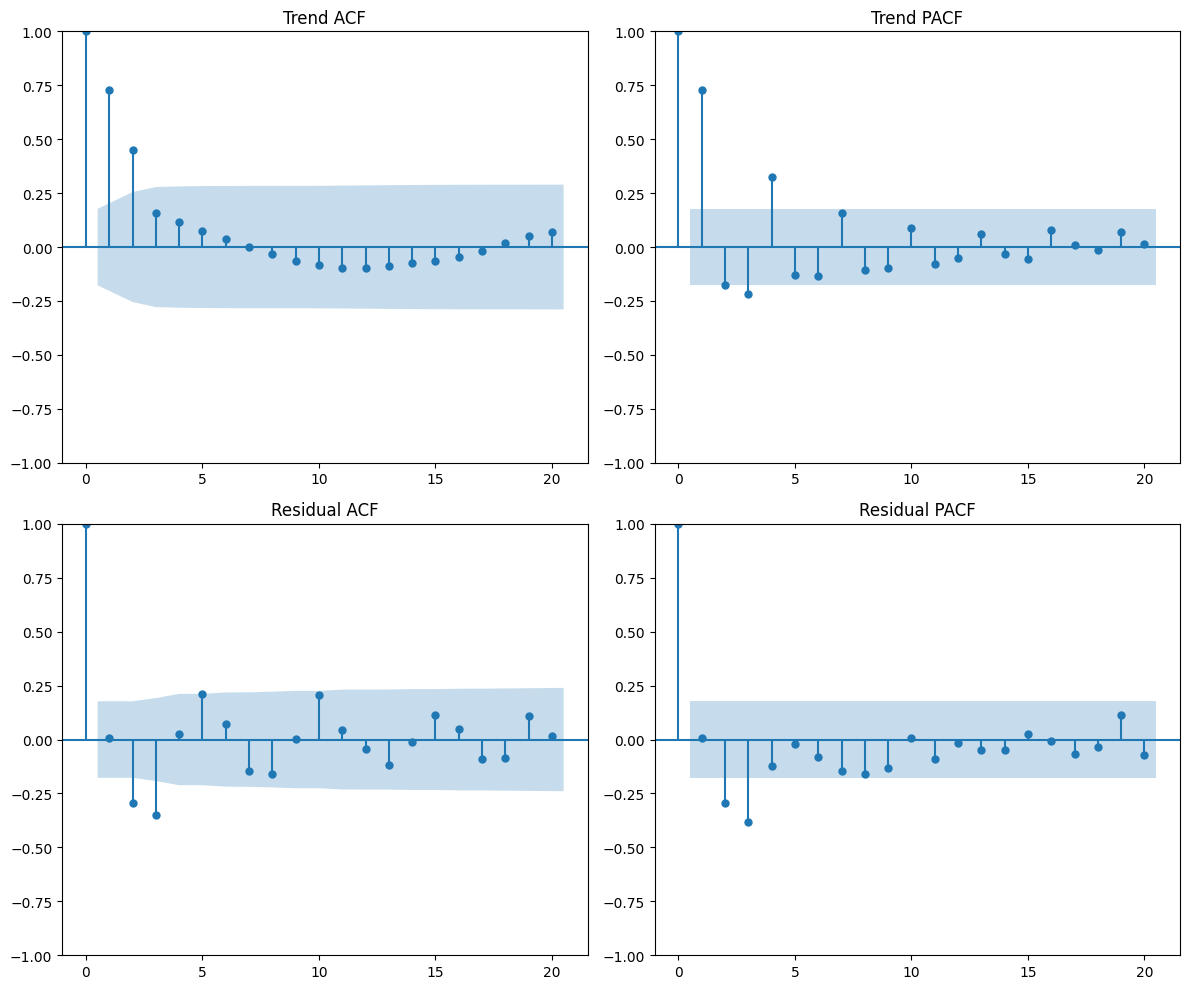

In [27]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 读取数据，直接解析日期
purchase_seq_train = pd.read_csv('./purchase_seq_train.csv', parse_dates=['report_date'], index_col='report_date')

# 确认数据列名
print(purchase_seq_train.columns)


timeseries = purchase_seq_train

# 进行季节性分解
decomposition = seasonal_decompose(timeseries, model='additive')  # 可以选择 'additive' 或 'multiplicative'
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# 填充缺失值
trend = trend.fillna(0)
seasonal = seasonal.fillna(0)
residual = residual.fillna(0)

# 创建一个 2x2 的子图
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# 绘制趋势的自相关图
plot_acf(trend, lags=20, ax=axs[0, 0])
axs[0, 0].set_title('Trend ACF')

# 绘制趋势的偏自相关图
plot_pacf(trend, lags=20, ax=axs[0, 1])
axs[0, 1].set_title('Trend PACF')

# 绘制残差的自相关图
plot_acf(residual, lags=20, ax=axs[1, 0])
axs[1, 0].set_title('Residual ACF')

# 绘制残差的偏自相关图
plot_pacf(residual, lags=20, ax=axs[1, 1])
axs[1, 1].set_title('Residual PACF')

# 调整布局
plt.tight_layout()
plt.show()


从上图可以看到：

（1）趋势序列 ACF 有 3 阶截尾，PACF 有 2 阶拖尾。因此可以选 p=2， q=3。

（2）残差序列 ACF 有 4 阶拖尾，PACF 有 4 阶截尾。因此可以选 p=4， q=4。

通过拖尾和截尾对模型定阶，具有很强的主观性。回顾一下我们对于模型参数估计得方法，是通过对损失和正则项的加权评估。我们在参数选择的时候，需要平衡预测误差与模型复杂度。我们可以根据信息准则函数法，来确定模型的阶数。这里介绍 AIC、BIC准则。

#### AIC 准则全称是最小化信息量准则（Akaike Information Criterion）：

<b style="color: red;" > $ AIC=-2ln(L)+2K$  其中 L 表示模型的极大似然函数， K 表示模型参数个数。</b>
AIC 准则存在一定的不足。当样本容量很大时，在 AIC 准则中拟合误差提供的信息就要受到样本容量的放大，而参数个数的惩罚因子却和样本容量没关系（一直是2），因此当样本容量很大时，使用 AIC 准则的模型不收敛于真实模型，它通常比真实模型所含的未知参数个数要多。
#### BIC（Bayesian InformationCriterion）贝叶斯信息准则弥补了 AIC 的不足：
<b style="color: red;" > $ BIC=-2ln(L)+Kln(n)$  其中 L 表示模型的极大似然函数， K 表示模型参数个数。</b>
<br></br>
<b style="color: green;" > 显然，这两个评价指标越小越好。我们通过网格搜索，确定 AIC、BIC 最优的模型（p、q）。</b>


In [32]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# 读取数据，直接解析日期
purchase_seq_train = pd.read_csv('./purchase_seq_train.csv', parse_dates=['report_date'],
                                 index_col='report_date')

# 进行季节性分解
decomposition = seasonal_decompose(purchase_seq_train, model='additive')  # 确保指定模型
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# 填充缺失值
trend = trend.fillna(0)
seasonal = seasonal.fillna(0)
residual = residual.fillna(0)

# 检查趋势序列的平稳性
result = adfuller(trend.dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# 如果 p-value > 0.05，数据是非平稳的，可以进行差分
if result[1] > 0.05:
    trend_diff = trend.diff().dropna()
else:
    trend_diff = trend

# 选择趋势序列的 ARMA 模型参数
trend_evaluate = sm.tsa.arma_order_select_ic(trend_diff, ic=['aic', 'bic'], trend='c', max_ar=4, max_ma=4)
print('trend AIC:', trend_evaluate.aic_min_order)
print('trend BIC:', trend_evaluate.bic_min_order)

# 选择残差序列的 ARMA 模型参数
residual_evaluate = sm.tsa.arma_order_select_ic(residual, ic=['aic', 'bic'], trend='c', max_ar=4, max_ma=4)
print('residual AIC:', residual_evaluate.aic_min_order)
print('residual BIC:', residual_evaluate.bic_min_order)


ADF Statistic: -3.2368487584485877
p-value: 0.017948383665881536


C:\Users\ROG\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ROG\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ROG\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ROG\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to

trend AIC: (1, 0)
trend BIC: (1, 0)


C:\Users\ROG\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


residual AIC: (2, 3)
residual BIC: (2, 1)


从评价准则的结果看（这里采用 AIC 结果）：

（1）对趋势序列，p = 1， q = 0

（2）对残差序列，p = 2， q = 1

下面我们将分别训练趋势序列和残差序列的 ARIMA 模型，并结合原序列的周期，拟合训练集数据，并预测测试集数据。

对于训练集，拟合序列 = 周期序列 + 趋势序列（ARIMA拟合） + 残差序列（ARIMA拟合）

对于测试集，预测序列 = 周期序列 + 趋势序列（ARIMA预测） + 残差序列（ARIMA预测）

C:\Users\ROG\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ROG\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ROG\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ROG\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ROG\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

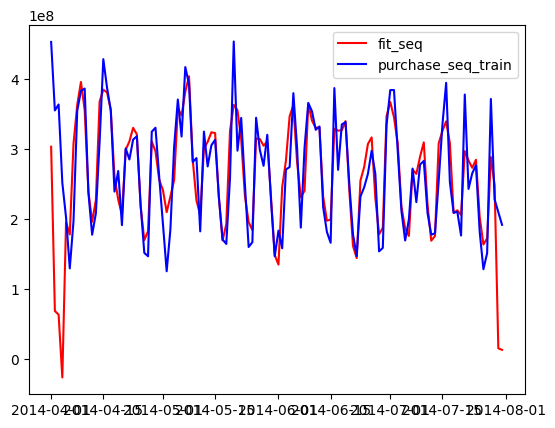

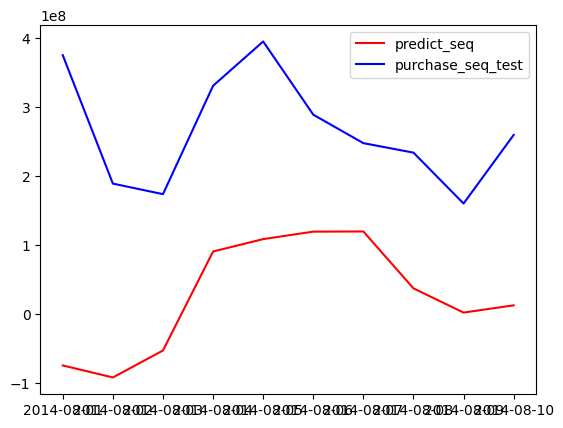

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

def ARIMA_Model(timeseries, order):
    model = ARIMA(timeseries, order=order)
    return model.fit()

# 使用 pd.to_datetime 代替 pd.datetime
purchase_seq_train = pd.read_csv('./purchase_seq_train.csv', parse_dates=['report_date'],
                                 index_col='report_date')

purchase_seq_test = pd.read_csv('./purchase_seq_test.csv', parse_dates=['report_date'],
                                index_col='report_date')

decomposition = seasonal_decompose(purchase_seq_train)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

trend = trend.fillna(0)
seasonal = seasonal.fillna(0)
residual = residual.fillna(0)

# 趋势序列模型训练
trend_model = ARIMA_Model(trend, (1, 0, 0))
trend_fit_seq = trend_model.fittedvalues
trend_predict_seq = trend_model.predict(start='2014-08-01', end='2014-08-10', dynamic=True)

# 残差序列模型训练
residual_model = ARIMA_Model(residual, (2, 0, 1))
residual_fit_seq = residual_model.fittedvalues
residual_predict_seq = residual_model.predict(start='2014-08-01', end='2014-08-10', dynamic=True)

# 拟合训练集
fit_seq = seasonal.add(trend_fit_seq, fill_value=0)
fit_seq = fit_seq.add(residual_fit_seq, fill_value=0)

plt.plot(fit_seq, color='red', label='fit_seq')
plt.plot(purchase_seq_train, color='blue', label='purchase_seq_train')
plt.legend(loc='best')
plt.show()

# 预测测试集
seasonal_predict_seq = seasonal['2014-04-04':'2014-04-13']

predict_dates = pd.date_range(start='2014-08-01', periods=10, freq='D')
seasonal_predict_seq.index = predict_dates

predict_seq = seasonal_predict_seq.add(trend_predict_seq, fill_value=0)
predict_seq = predict_seq.add(residual_predict_seq, fill_value=0)

plt.plot(predict_seq, color='red', label='predict_seq')
plt.plot(purchase_seq_test, color='blue', label='purchase_seq_test')
plt.legend(loc='best')
plt.show()


从结果来看，模型拟合训练集的效果还是不错的；在测试集上，模型基本上预测了序列的趋势和波动。实际上，这样的数据集不适合用 ARIMA 模型来拟合（序列的（线性）自相关性不强，受随机噪声影响较大），但是这里我们采用了时间序列分解的方法，暂且预测了一个序列的趋势。